In [157]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
def plot(events):
    fig, ax = plt.subplots(figsize=(20,1))
    plt.plot(events, np.zeros_like(events), 'or', marker='|', markersize=15)
    xfmt = mdates.DateFormatter('%d-%m-%y')
    ax.xaxis.set_major_formatter(xfmt)
    ax.set_yticklabels([])
    plt.grid()
#     plt.savefig("examples/example9.png", bbox_inches='tight')
    plt.show()

In [256]:
import datetime
filename = 'KonusWIND_SolarFlares.txt'
sevents = []
f = open(filename, 'r+')
f.readline()
f.readline()
for line in f:
    a = line.split('\t')
    d = datetime.datetime.strptime(
            a[1] + " " + a[2], '%Y-%m-%d %H:%M:%S.%f')
    sevents.append(d)
f.close() 

In [258]:
stime_intervals = [[str(sevents[0]), str(sevents[-1])]]

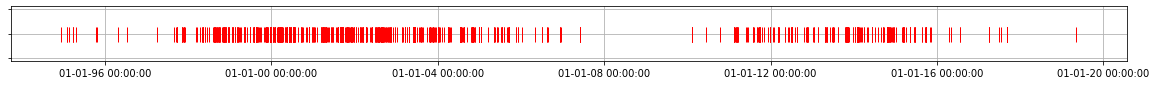

In [259]:
plot(sevents)

In [4]:
from event_generator import Events

In [260]:
start, sintrvls = Events.dates_to_seconds(time_intervals)
sevnts = []
for event in sevents:
    sevnts.append((event-start).total_seconds())
sevnts = np.array(sevnts)
sintrvls = np.array(sintrvls)

In [396]:
from search_period import periods_statistic

In [261]:
sper, sstat, sstat1, sstat2 = periods_statistic(sevnts, sintrvls, 10, (1/12)*365*24*3600, sevnts[-1]-sevnts[0], n_steps = 100000)

Completed for 2.5648637334505717 minutes


/Users/Maksat/Desktop/IKI/xraybursters/search_period.py:19: RuntimeWarning: divide by zero encountered in true_divide
  folded1 = folded/((expo.T/np.max(expo, axis=1)).T)
/Users/Maksat/Desktop/IKI/xraybursters/search_period.py:26: RuntimeWarning: invalid value encountered in true_divide
  chi_square1 = np.sum((folded1.T - expected)**2/expected1, axis=0)
/Users/Maksat/Desktop/IKI/xraybursters/search_period.py:29: RuntimeWarning: divide by zero encountered in true_divide
  chi_square2 = np.sum((folded2 - expected2)**2/expected2, axis=1)


In [262]:
sper[-1]/(365*24*3600)

24.408161742231105

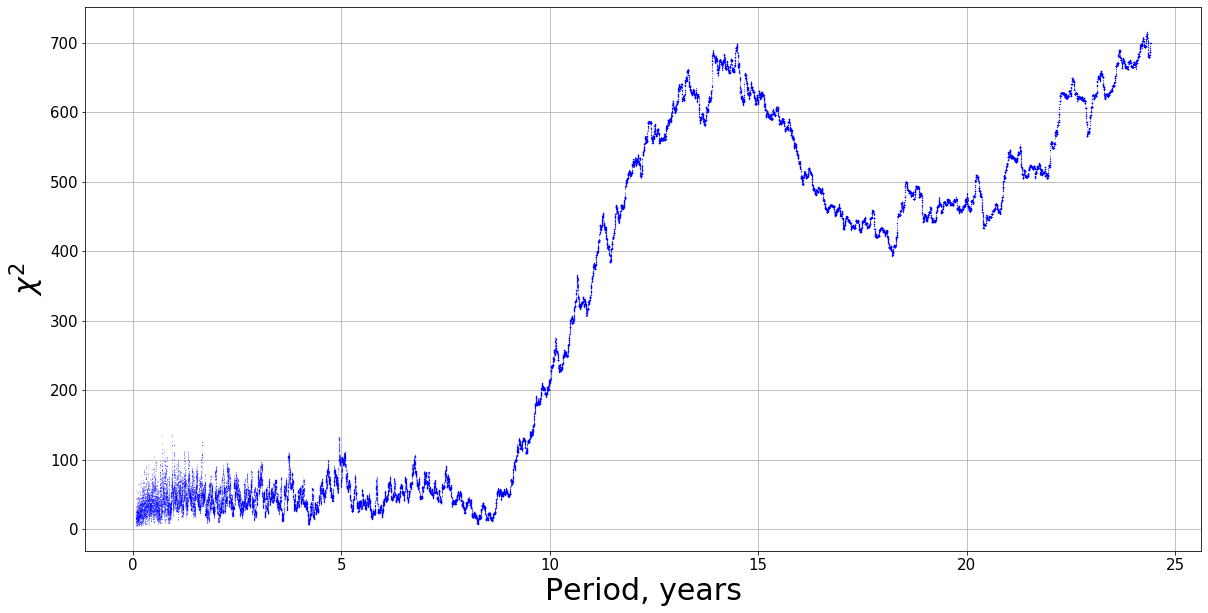

In [265]:
fig, ax = plt.subplots(figsize=(20,10))
# plt.plot(np.array(per)/(365*24*3600), stat, 'royalblue')
plt.plot(np.array(sper)/(365*24*3600), sstat, 'bo', markersize=0.1)

plt.xlabel('Period, years', fontsize=fontsize)
plt.ylabel('$\chi^2$', fontsize=fontsize)
plt.grid()
plt.savefig("examples/example6.png", bbox_inches='tight')
# plt.xlim(10,15)
plt.xticks(fontsize=labelsize)
plt.yticks(fontsize=labelsize)
plt.savefig("/Users/Maksat/Desktop/IKI/tex/media/pic17.png", bbox_inches='tight', dpi=200)
plt.show()


In [172]:
per[np.argmax(stat1)]/(365*24*3600)

14.49640967431569

In [11]:
intrvls.shape[0]

1

/Users/Maksat/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


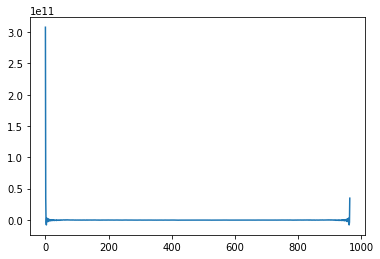

In [34]:
plt.plot(np.fft.fft(evnts))

In [36]:
import os

In [42]:
import os
os.path.abspath(os.getcwd())

'/Users/Maksat/Desktop/IKI/xraybursters'

In [2]:
import matplotlib
# Use the pgf backend (must be set before pyplot imported)


# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
def plot(events):
    fig, ax = plt.subplots(figsize=(20,1))
    plt.plot(events, np.zeros_like(events), 'or', marker='|', markersize=15)
    xfmt = mdates.DateFormatter('%d-%m-%y %H:%M:%S')
    ax.xaxis.set_major_formatter(xfmt)
    ax.set_yticklabels([])
    plt.grid()
    plt.show()

In [2]:
def sin_signal(t, period, phase=0, m=0.4):
    return 1-m*(1-np.sin(2*np.pi*t/period+phase))

def pulse_wave(t, period, phase=0, m=0.5):
    period1 = m*period
    period2 = period*(1-m)
    return (t-phase)%(period1+period2)>period1

def one(t, *args):
    return 1

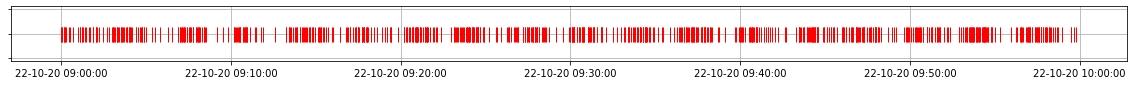

In [66]:
a = Events(1/3, [['2020-10-22 09:00:00.000000','2020-10-22 10:00:00.000000']], sin_signal , 200)
plot(a.events)
period = 200
period1 = 73
evnts = np.array(a.events_in_seconds)

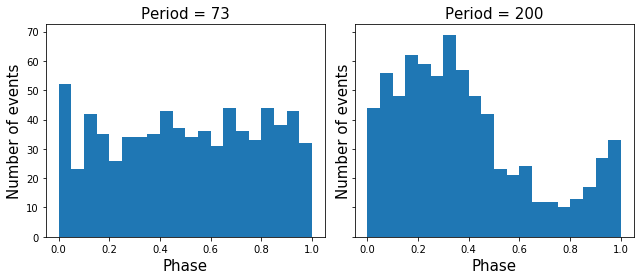

In [67]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(9,4))
fontsize = 15
labelsize = 10
axs[1].hist(evnts%period/period, 20, range=(0,1))
axs[1].set_xlabel('Phase', fontsize = fontsize)
axs[1].set_ylabel('Number of events', fontsize = fontsize)
axs[1].set_title('Period = ' + str(period), fontsize = fontsize)
axs[1].tick_params(axis='x', labelsize= labelsize)
axs[1].tick_params(axis='y', labelsize= labelsize)
axs[0].hist(evnts%period1/period1, 20, range=(0,1))
axs[0].set_xlabel('Phase', fontsize = fontsize)
axs[0].set_ylabel('Number of events', fontsize = fontsize)
axs[0].set_title('Period = ' + str(period1), fontsize = fontsize)
axs[0].tick_params(axis='x', labelsize= labelsize)
axs[0].tick_params(axis='y', labelsize= labelsize)
# matplotlib.rc('xtick', labelsize=20) 

# plt.savefig("/Users/Maksat/Desktop/IKI/tex/media/pic2.eps", bbox_inches='tight')

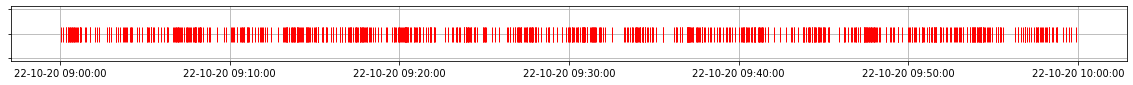

In [237]:
b = Events(1/3, [['2020-10-22 09:00:00.000000','2020-10-22 10:00:00.000000']], sin_signal , 200)
plot(b.events)
period = 200
period1 = 73
bevnts = np.array(b.events_in_seconds)

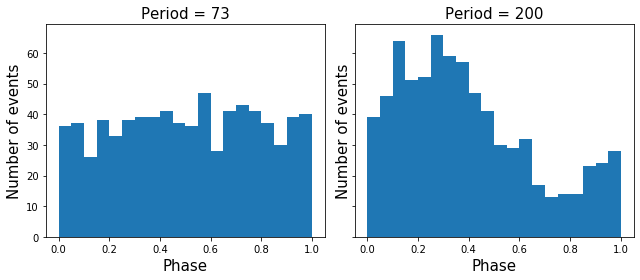

In [238]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(9,4))
fontsize = 15
labelsize = 10
axs[1].hist(bevnts%period/period, 20, range=(0,1))
axs[1].set_xlabel('Phase', fontsize = fontsize)
axs[1].set_ylabel('Number of events', fontsize = fontsize)
axs[1].set_title('Period = ' + str(period), fontsize = fontsize)
axs[1].tick_params(axis='x', labelsize= labelsize)
axs[1].tick_params(axis='y', labelsize= labelsize)
axs[0].hist(bevnts%period1/period1, 20, range=(0,1))
axs[0].set_xlabel('Phase', fontsize = fontsize)
axs[0].set_ylabel('Number of events', fontsize = fontsize)
axs[0].set_title('Period = ' + str(period1), fontsize = fontsize)
axs[0].tick_params(axis='x', labelsize= labelsize)
axs[0].tick_params(axis='y', labelsize= labelsize)


# plt.savefig("/Users/Maksat/Desktop/IKI/tex/media/pic1.eps", bbox_inches='tight')

In [239]:
from search_period import periods_statistic
bintrvls = np.array(b.intervals_in_seconds)
bper, bstat, bstat1, bstat2 = periods_statistic(bevnts, bintrvls, 5, 10, 500, n_steps = 1000)

Completed for 0.0036846518516540526 minutes


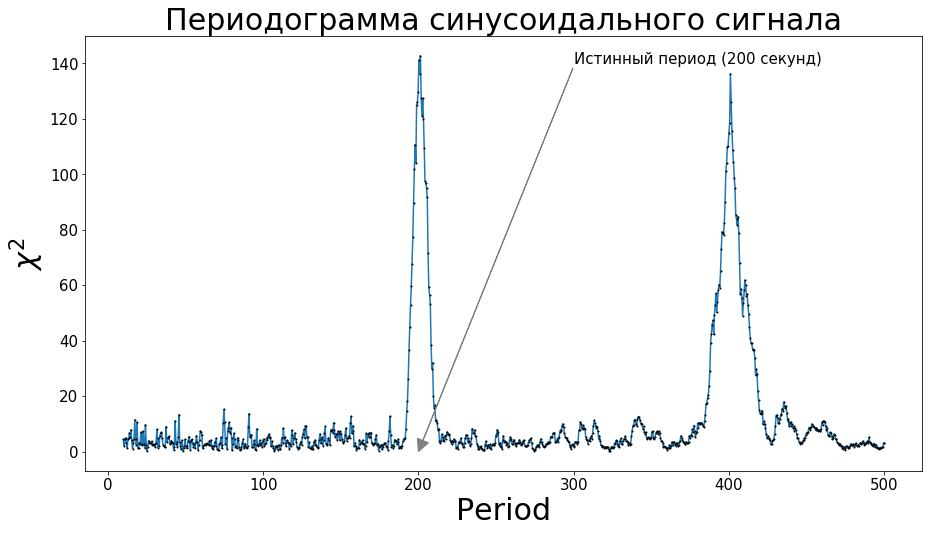

Period =  86436.03603603604


In [243]:
labelsize = 15
fontsize = 30
fig, ax = plt.subplots(figsize=(15,8))
plt.annotate('Истинный период (200 секунд)', (200, 0), xytext=(300, 140), arrowprops=dict(color='gray', width=0.3),fontsize=15)
plt.plot(bper, bstat)
plt.plot(bper, bstat, 'ko', markersize=1)
plt.xlabel('Period', fontsize=fontsize)
plt.ylabel('$\chi^2$', fontsize=fontsize)
plt.title('Периодограмма синусоидального сигнала', fontsize=fontsize)
plt.xticks(fontsize=labelsize)
plt.yticks(fontsize=labelsize)
# plt.savefig("/Users/Maksat/Desktop/IKI/tex/media/pic3.eps", bbox_inches='tight')
plt.show()
print("Period = ", per[np.argmax(stat)])

In [95]:
time_intervals = []

for i in range(1,30):
    if len(str(i))==1:
        a = '2020-11-0' + str(i)+ ' 22:00:00.000000'
    else:
        a = '2020-11-' + str(i)+ ' 22:00:00.000000'
    
    if len(str(i+1))==1:
        b = '2020-11-0' + str(i+1)+ ' 02:00:00.000000'
    else:
        b = '2020-11-' + str(i+1)+ ' 02:00:00.000000'
    time_intervals.append([a,b])

time_intervals.append(['2020-11-30 22:00:00.000000', '2020-12-01 02:00:00.000000'])
for i in range(1,31):
    if len(str(i))==1:
        a = '2020-12-0' + str(i)+ ' 22:00:00.000000'
    else:
        a = '2020-12-' + str(i)+ ' 22:00:00.000000'
    
    if len(str(i+1))==1:
        b = '2020-12-0' + str(i+1)+ ' 02:00:00.000000'
    else:
        b = '2020-12-' + str(i+1)+ ' 02:00:00.000000'
    time_intervals.append([a,b])

time_intervals.append(['2020-12-31 22:00:00.000000', '2021-01-01 02:00:00.000000'])
for i in range(1,31):
    if len(str(i))==1:
        a = '2021-01-0' + str(i)+ ' 22:00:00.000000'
    else:
        a = '2021-01-' + str(i)+ ' 22:00:00.000000'
    
    if len(str(i+1))==1:
        b = '2021-01-0' + str(i+1)+ ' 02:00:00.000000'
    else:
        b = '2021-01-' + str(i+1)+ ' 02:00:00.000000'
    time_intervals.append([a,b])
    
time_intervals.append(['2021-01-31 22:00:00.000000', '2021-02-01 02:00:00.000000'])
for i in range(1,28):
    if len(str(i))==1:
        a = '2021-02-0' + str(i)+ ' 22:00:00.000000'
    else:
        a = '2021-02-' + str(i)+ ' 22:00:00.000000'
    
    if len(str(i+1))==1:
        b = '2021-02-0' + str(i+1)+ ' 02:00:00.000000'
    else:
        b = '2021-02-' + str(i+1)+ ' 02:00:00.000000'
    time_intervals.append([a,b])    
    
time_intervals.append(['2021-02-28 22:00:00.000000', '2021-03-01 02:00:00.000000'])
for i in range(1,31):
    if len(str(i))==1:
        a = '2021-03-0' + str(i)+ ' 22:00:00.000000'
    else:
        a = '2021-03-' + str(i)+ ' 22:00:00.000000'
    
    if len(str(i+1))==1:
        b = '2021-03-0' + str(i+1)+ ' 02:00:00.000000'
    else:
        b = '2021-03-' + str(i+1)+ ' 02:00:00.000000'
    time_intervals.append([a,b])
print(len(time_intervals))

150


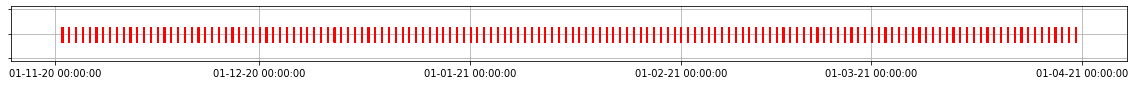

36221


0.20961226851851852

In [96]:
a = Events(100/(60*60), time_intervals, sin_signal, 10.5*24*3600)
# a = Events(1, time_intervals, sin_signal, 0, 2*24*3600)
plot(a.events)
evnts = np.array(a.events_in_seconds)
intrvls = np.array(a.intervals_in_seconds)
print(len(evnts))
len(evnts)/np.sum(intrvls[1]-intrvls[0])

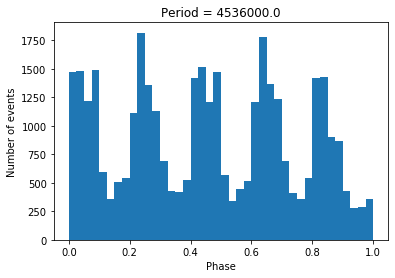

In [97]:
evnts = np.array(a.events_in_seconds)
period = 5*10.5*24*3600
n, bins, patches = plt.hist(evnts%period/period, 40, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
# plt.savefig("/Users/Maksat/Desktop/IKI/tex/media/pic9.eps", bbox_inches='tight')
plt.show()

In [98]:
nsteps = 1000
per, stat, stat1, stat2 = periods_statistic(evnts, intrvls, 5, 2*3600, 20*24*3600, n_steps = nsteps)

Completed for 0.05228625138600667 minutes


/Users/Maksat/Desktop/IKI/xraybursters/search_period.py:19: RuntimeWarning: invalid value encountered in true_divide
  folded1 = folded/((expo.T/np.max(expo, axis=1)).T)
/Users/Maksat/Desktop/IKI/xraybursters/search_period.py:29: RuntimeWarning: invalid value encountered in true_divide
  chi_square2 = np.sum((folded2 - expected2)**2/expected2, axis=1)


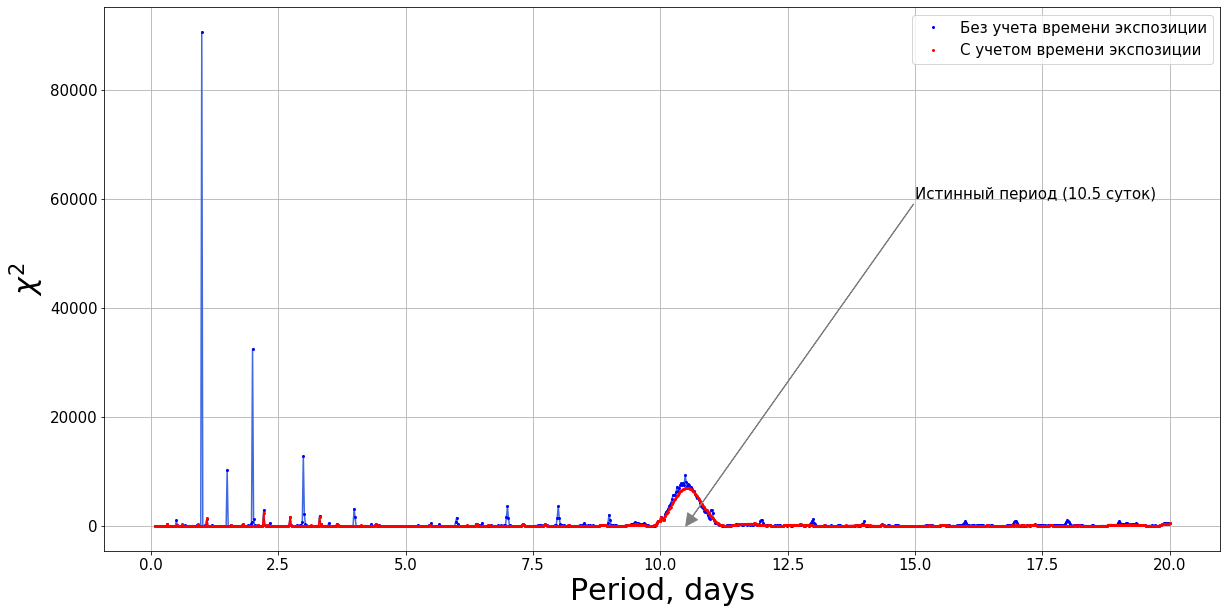

In [268]:
fig, ax = plt.subplots(figsize=(20,10))
labelsize = 15
fontsize = 30
plt.annotate('Истинный период (10.5 суток)', (10.5, 0), xytext=(15, 60000), arrowprops=dict(color='gray', width=0.3), fontsize=15)

plt.plot(np.array(per)/(3600*24), stat, 'royalblue')
plt.plot(np.array(per)/(3600*24), stat, 'bo', markersize=2, label='Без учета времени экспозиции')

plt.plot(np.array(per)/(3600*24), stat2, 'red')
plt.plot(np.array(per)/(3600*24), stat2, 'ro', markersize=2, label='С учетом времени экспозиции')
# plt.yscale('log')

plt.xlabel('Period, days', fontsize=fontsize)
plt.ylabel('$\chi^2$', fontsize=fontsize)
plt.legend(fontsize = 15)
plt.xticks(fontsize=labelsize)
plt.yticks(fontsize=labelsize)
plt.grid()
# plt.savefig("/Users/Maksat/Desktop/IKI/tex/media/pic4.eps", bbox_inches='tight')
plt.show()

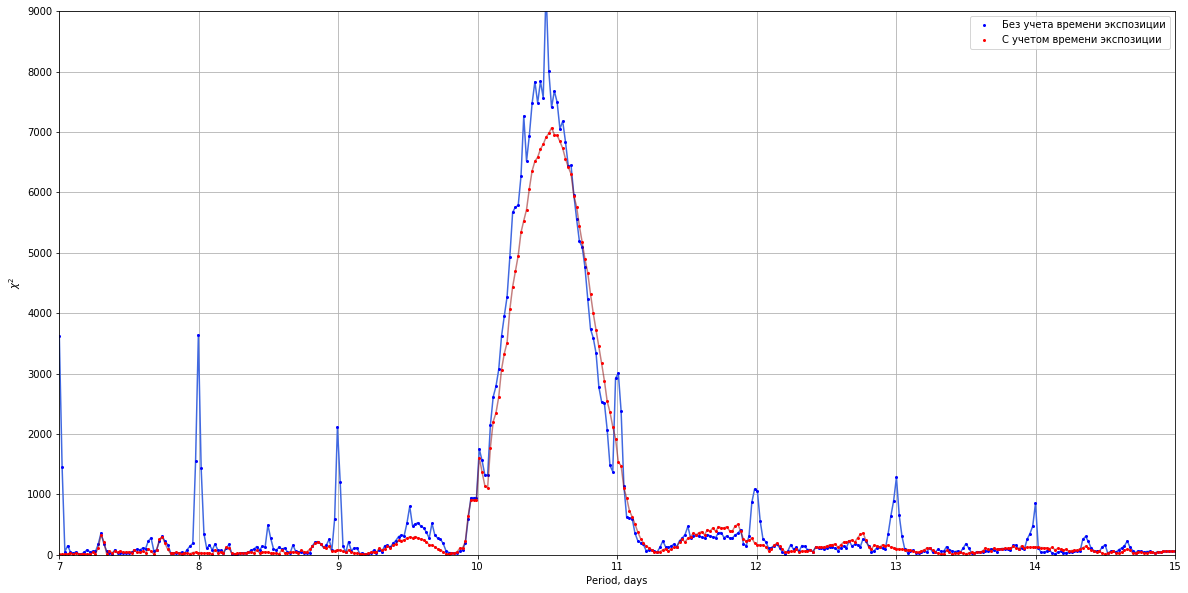

In [202]:
fig, ax = plt.subplots(figsize=(20,10))

plt.plot(np.array(per)/(3600*24), stat, 'royalblue')
plt.plot(np.array(per)/(3600*24), stat, 'bo', markersize=2, label='Без учета времени экспозиции')

plt.plot(np.array(per)/(3600*24), stat2, 'darkred', alpha = 0.5)
plt.plot(np.array(per)/(3600*24), stat2, 'ro', markersize=2, label='С учетом времени экспозиции')

# plt.plot(np.array(per)/(3600*24), stat2, 'g')
# plt.plot(np.array(per)/(3600*24), stat2, 'go', markersize=2, label='С учетом экспозиции 2')

# plt.plot(np.array(per2)/(3600*24), stat2)
# plt.plot(np.array(per2)/(3600*24), stat2, 'ro', markersize=2)
plt.xlabel('Period, days')
plt.ylabel('$\chi^2$')
plt.legend()
plt.grid()
# plt.savefig("examples/example6.png", bbox_inches='tight')
plt.xlim(7,15)
plt.ylim(0, 9000)
# plt.savefig("/Users/Maksat/Desktop/IKI/tex/media/pic13.eps", bbox_inches='tight')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


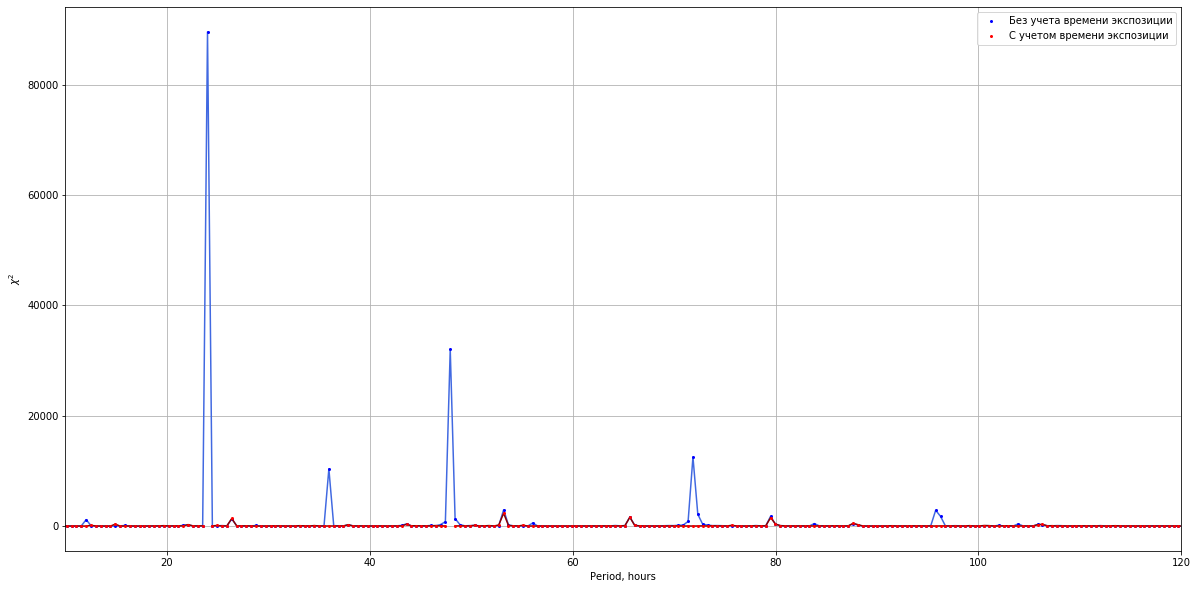

In [219]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(np.array(per)/(3600), stat, 'royalblue')
plt.plot(np.array(per)/(3600), stat, 'bo', markersize=2, label='Без учета времени экспозиции')
plt.plot(np.array(per)/(3600), stat2, 'darkred')
plt.plot(np.array(per)/(3600), stat2, 'ro', markersize=2, label='С учетом времени экспозиции')
# plt.plot(np.array(per)/(3600), stat2, 'g')
# plt.plot(np.array(per)/(3600), stat2, 'go', markersize=2, label='С учетом экспозиции')

# plt.plot(np.array(per2)/(3600*24), stat2)
# plt.plot(np.array(per2)/(3600*24), stat2, 'ro', markersize=2)
plt.xlabel('Period, hours')
plt.ylabel('$\chi^2$')
plt.legend()
plt.grid()
# plt.savefig("examples/example6.png", bbox_inches='tight')
plt.xlim(10,5*24)
# plt.savefig("/Users/Maksat/Desktop/IKI/tex/media/pic14.eps", bbox_inches='tight')
plt.show()


In [229]:
p = per[100:]
np.max(stat2[100:])

6621.711348754895

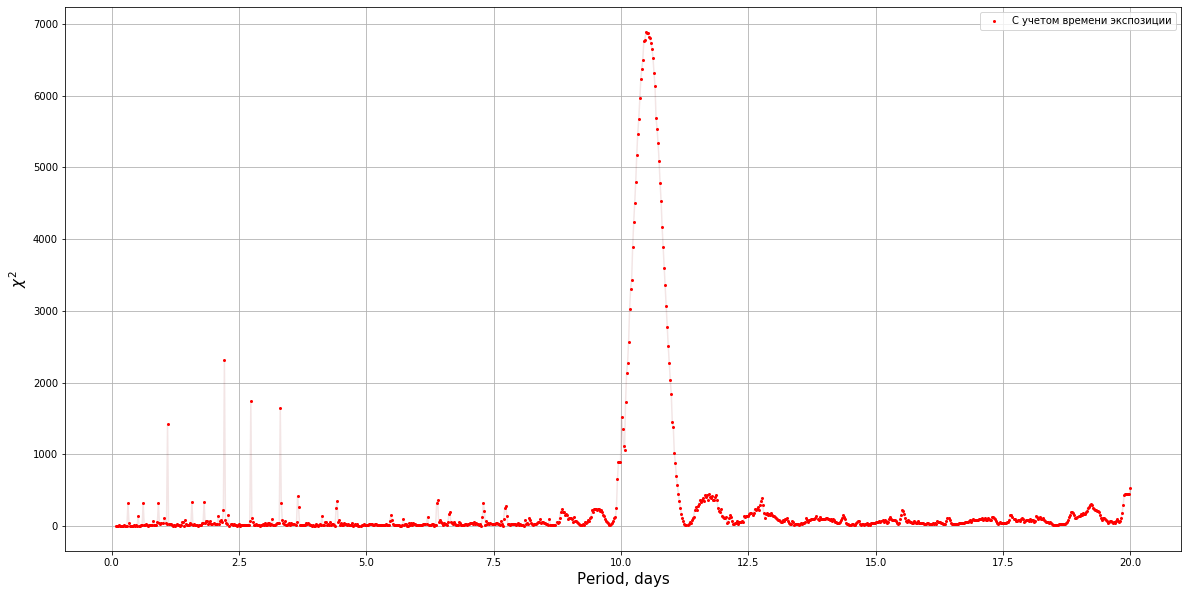

In [199]:
fig, ax = plt.subplots(figsize=(20,10))

# plt.plot(np.array(per)/(3600*24), stat, 'royalblue')
# plt.plot(np.array(per)/(3600*24), stat, 'bo', markersize=2, label='Без учета времени экспозиции')

plt.plot(np.array(per)/(3600*24), stat2, 'darkred', alpha = 0.1)
plt.plot(np.array(per)/(3600*24), stat2, 'ro', markersize=2, label='С учетом времени экспозиции')

plt.xlabel('Period, days', fontsize=15)
plt.ylabel('$\chi^2$', fontsize=15)
plt.legend()
plt.grid()
# plt.savefig("/Users/Maksat/Desktop/IKI/tex/media/pic12.eps", bbox_inches='tight')
plt.show()

In [210]:
chi = np.max(stat2[100:])
print(chi)
p = per[100:]
print(p[np.argmax(stat2[100:])]/(24*3600))
# np.longdouble(np.exp(-chi/2))

7069.854934555667
10.530113446780113


In [204]:
import decimal
decimal.Decimal(-chi/2)

decimal.Decimal(-chi/2).exp()

Decimal('6.316944089139152544182416282E-1536')

In [151]:
num = 1000
freq = len(evnts)/(len(time_intervals)*4*3600)
print(freq)
stats = np.zeros((num, nsteps))
for i in range(num):
    x = Events(freq, time_intervals, one, 0)
    xevnts = np.array(x.events_in_seconds)
    xintrvls = np.array(x.intervals_in_seconds)
    print(i)
    xper, xstat, xstat1, xstat2 = periods_statistic(xevnts, xintrvls, 5, 2*3600, 20*24*3600, n_steps = nsteps)
    stats[i] = xstat2
    
    

0.016768981481481482
0


/Users/Maksat/Desktop/IKI/xraybursters/search_period.py:19: RuntimeWarning: invalid value encountered in true_divide
  folded1 = folded/((expo.T/np.max(expo, axis=1)).T)
/Users/Maksat/Desktop/IKI/xraybursters/search_period.py:29: RuntimeWarning: invalid value encountered in true_divide
  chi_square2 = np.sum((folded2 - expected2)**2/expected2, axis=1)


Completed for 0.058458964029947914 minutes
1
Completed for 0.055993433793385824 minutes
2
Completed for 0.04231305122375488 minutes
3
Completed for 0.04756258328755696 minutes
4
Completed for 0.04274988571802775 minutes
5
Completed for 0.040329718589782716 minutes
6
Completed for 0.05807137091954549 minutes
7
Completed for 0.04511495431264242 minutes
8
Completed for 0.03961398204167684 minutes
9
Completed for 0.039588717619578044 minutes
10
Completed for 0.03766836722691854 minutes
11
Completed for 0.03817632993062337 minutes
12
Completed for 0.03760857979456584 minutes
13
Completed for 0.038261000315348306 minutes
14
Completed for 0.037310866514841716 minutes
15
Completed for 0.037996216615041094 minutes
16
Completed for 0.03844304879506429 minutes
17
Completed for 0.0382418950398763 minutes
18
Completed for 0.037752433617909746 minutes
19
Completed for 0.038195518652598064 minutes
20
Completed for 0.03756576379140218 minutes
21
Completed for 0.03766788244247436 minutes
22
Completed f

Completed for 0.03833871682484945 minutes
181
Completed for 0.03925257126490275 minutes
182
Completed for 0.0382781982421875 minutes
183
Completed for 0.04206178585688273 minutes
184
Completed for 0.038281134764353436 minutes
185
Completed for 0.03877172072728475 minutes
186
Completed for 0.03767209847768148 minutes
187
Completed for 0.039555768171946205 minutes
188
Completed for 0.03815093437830607 minutes
189
Completed for 0.03830604950586955 minutes
190
Completed for 0.03754343589146932 minutes
191
Completed for 0.03844348589579264 minutes
192
Completed for 0.03761788606643677 minutes
193
Completed for 0.039280247688293454 minutes
194
Completed for 0.03842657009760539 minutes
195
Completed for 0.03809497753779093 minutes
196
Completed for 0.037913310527801516 minutes
197
Completed for 0.038226179281870526 minutes
198
Completed for 0.037943685054779054 minutes
199
Completed for 0.039486547311147056 minutes
200
Completed for 0.03814503351847331 minutes
201
Completed for 0.038230502605

Completed for 0.037819615999857586 minutes
359
Completed for 0.03764745394388835 minutes
360
Completed for 0.037604935963948566 minutes
361
Completed for 0.036952650547027587 minutes
362
Completed for 0.038516096274058026 minutes
363
Completed for 0.03681424856185913 minutes
364
Completed for 0.037780765692392984 minutes
365
Completed for 0.036592249075571695 minutes
366
Completed for 0.03830461899439494 minutes
367
Completed for 0.038440199693044026 minutes
368
Completed for 0.038021401564280195 minutes
369
Completed for 0.03753288586934408 minutes
370
Completed for 0.03783332109451294 minutes
371
Completed for 0.03883001406987508 minutes
372
Completed for 0.03796281417210897 minutes
373
Completed for 0.03867716789245605 minutes
374
Completed for 0.03843358357747396 minutes
375
Completed for 0.037757297356923424 minutes
376
Completed for 0.039271477858225504 minutes
377
Completed for 0.03854061762491862 minutes
378
Completed for 0.037907699743906655 minutes
379
Completed for 0.0383025

Completed for 0.0918312668800354 minutes
537
Completed for 0.08961684703826904 minutes
538
Completed for 0.04652958313624064 minutes
539
Completed for 0.10203100045522054 minutes
540
Completed for 0.10677621761957805 minutes
541
Completed for 0.08350581725438436 minutes
542
Completed for 0.05788041750590007 minutes
543
Completed for 0.039847834904988604 minutes
544
Completed for 0.04075026512145996 minutes
545
Completed for 0.04037164847056071 minutes
546
Completed for 0.06602121591567993 minutes
547
Completed for 0.09547788302103678 minutes
548
Completed for 0.06908250252405802 minutes
549
Completed for 0.05266056458155314 minutes
550
Completed for 0.04390947024027506 minutes
551
Completed for 0.04881086349487305 minutes
552
Completed for 0.04951071739196777 minutes
553
Completed for 0.05192394653956096 minutes
554
Completed for 0.05629703203837077 minutes
555
Completed for 0.06755014657974243 minutes
556
Completed for 0.047028581301371254 minutes
557
Completed for 0.04952263832092285

Completed for 0.03661258220672607 minutes
715
Completed for 0.037753530343373615 minutes
716
Completed for 0.03849331537882487 minutes
717
Completed for 0.03690019845962524 minutes
718
Completed for 0.0379740039507548 minutes
719
Completed for 0.03697321812311808 minutes
720
Completed for 0.03796019554138184 minutes
721
Completed for 0.03785769939422608 minutes
722
Completed for 0.03847407102584839 minutes
723
Completed for 0.03752323389053345 minutes
724
Completed for 0.03820616404215495 minutes
725
Completed for 0.03694966634114583 minutes
726
Completed for 0.03744504849116007 minutes
727
Completed for 0.03737028042475383 minutes
728
Completed for 0.03773719867070516 minutes
729
Completed for 0.03821776707967122 minutes
730
Completed for 0.03815415302912394 minutes
731
Completed for 0.03781219720840454 minutes
732
Completed for 0.03682331641515096 minutes
733
Completed for 0.03766208489735921 minutes
734
Completed for 0.03672109444936116 minutes
735
Completed for 0.038403149445851645

Completed for 0.038234031200408934 minutes
893
Completed for 0.039260931809743244 minutes
894
Completed for 0.038544718424479166 minutes
895
Completed for 0.037976030508677164 minutes
896
Completed for 0.043431683381398516 minutes
897
Completed for 0.04808871746063233 minutes
898
Completed for 0.04434671401977539 minutes
899
Completed for 0.04329431454340617 minutes
900
Completed for 0.04153504769007365 minutes
901
Completed for 0.041129016876220705 minutes
902
Completed for 0.040580916404724124 minutes
903
Completed for 0.037973666191101076 minutes
904
Completed for 0.036956600348154706 minutes
905
Completed for 0.03894976774851481 minutes
906
Completed for 0.03956193129221598 minutes
907
Completed for 0.038389547665913897 minutes
908
Completed for 0.03813756704330444 minutes
909
Completed for 0.03898360331853231 minutes
910
Completed for 0.04055343468983968 minutes
911
Completed for 0.03834404945373535 minutes
912
Completed for 0.03752851883570353 minutes
913
Completed for 0.03839720

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


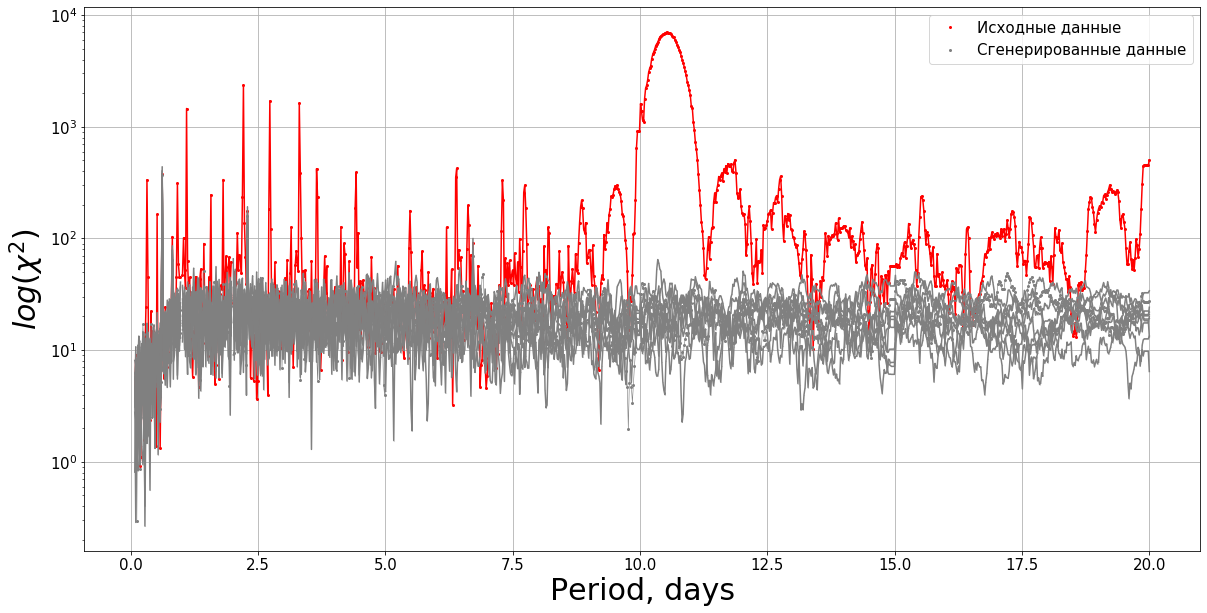

In [253]:
labelsize = 15
fontsize = 30

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(np.array(per)/(3600*24), stat2, 'red', alpha = 1.0)
plt.plot(np.array(per)/(3600*24), stat2, 'ro', markersize=2, label='Исходные данные')

plt.plot(np.array(xper)/(3600*24), stats[0], 'grey', linewidth=0.6)
plt.plot(np.array(xper)/(3600*24), stats[0], 'o', color='gray', markersize=2, label='Сгенерированные данные')
for i in range(1, 10):
    plt.plot(np.array(xper)/(3600*24), stats[i], 'grey')#, linewidth=0.1)
    plt.plot(np.array(xper)/(3600*24), stats[i], 'o', color='gray', markersize=0.1, alpha = 1.0)
    

plt.yscale('log')
plt.xlabel('Period, days', fontsize=fontsize)
plt.ylabel('$log(\chi^2)$', fontsize=fontsize)
plt.legend(fontsize = 15)
plt.xticks(fontsize=labelsize)
plt.yticks(fontsize=labelsize)
plt.grid()
plt.savefig("/Users/Maksat/Desktop/IKI/tex/media/pic6.eps", bbox_inches='tight')
# plt.xlim(7, 15)
# plt.ylim(0, 5000)
plt.show()

In [153]:
# stats.T[10]
p = per[100:]
p[np.argmax(stat2[100:])]/24/3600
c = stats.T[np.argmax(stat2[100:])]

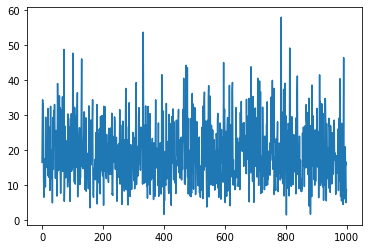

In [154]:
plt.plot(c)

In [161]:
np.std(c)

8.517431792126219

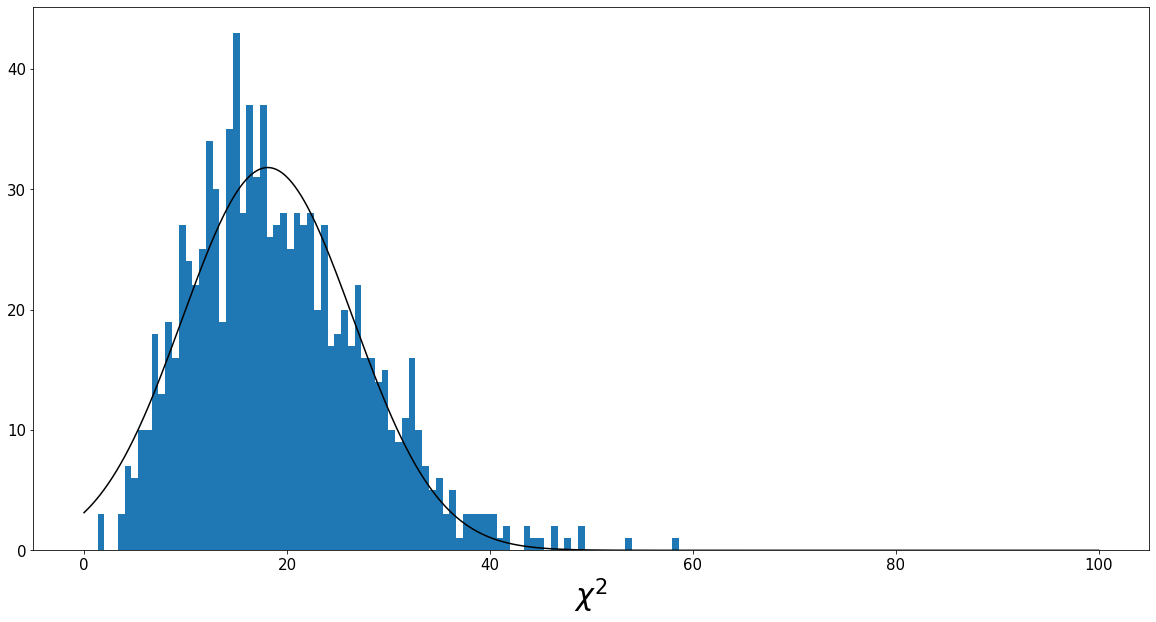

In [269]:
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))


xmin = 0
xmax = 100

xxx = np.linspace(xmin, xmax, 1000)

fig, ax = plt.subplots(figsize=(20,10))
n, bins, patches = plt.hist(c, 150, range=(xmin, xmax))
popt,pcov = curve_fit(gaus,bins[1:], n,p0=[10,20,10])
plt.plot(xxx, gaus(xxx, *popt), 'black')
plt.xlabel("$\chi^2$", fontsize=fontsize)
plt.xticks(fontsize=labelsize)
plt.yticks(fontsize=labelsize)
plt.savefig("/Users/Maksat/Desktop/IKI/tex/media/pic16.eps", bbox_inches='tight')
plt.show()

In [150]:
np.sum(n)

100.0

In [145]:
chi = np.max(stat2[100:])

In [203]:
chi

7069.854934555667

In [147]:
(chi-popt[1])/popt[2]

840.3284224181476

ModuleNotFoundError: No module named 'minbar'